In [3]:
# read in data
import pandas as pd
df = pd.read_csv('mbti_1.csv')

In [4]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [5]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

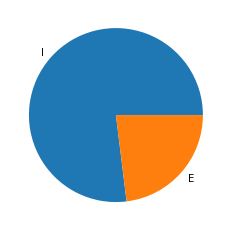

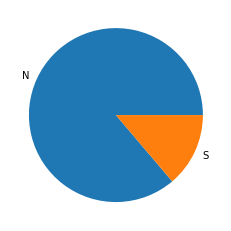

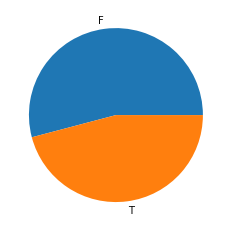

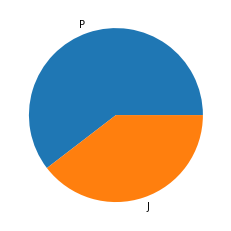

In [6]:
for i in range(4):
    types = [t[i] for t in df['type']]
    pd.Series(types).value_counts().plot(kind='pie', label="")
    plt.show()

In [7]:
import numpy as np

# break up each row into its constituent sentences
# drop any row that has more than 50 sentences (these often have ||||||| in them)
l = df['posts'].values.tolist()
targets = df['type'].values.tolist()
new_list_1 = [x.split('|||') for x in l]

for i in range(len(new_list_1)):
    new_list_1[i].insert(0, targets[i])
    
new_list = [x for x in new_list_1 if len(x) <= 51]
df_mbti = pd.DataFrame(new_list)


In [8]:
df_mbti.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,enfp and intj moments https://www.youtube.com...,What has been the most life-changing experienc...,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,May the PerC Experience immerse you.,The last thing my INFJ friend posted on his fa...,Hello ENFJ7. Sorry to hear of your distress. I...,84389 84390 http://wallpaperpassion.com/uplo...,...,http://www.serebii.net/potw-dp/Scizor.jpg,Not all artists are artists because they draw....,"Welcome to the robot ranks, person who downed ...",Banned for taking all the room under my bed. Y...,http://www.youtube.com/watch?v=w8IgImn57aQ,"Banned for being too much of a thundering, gru...",Ahh... old high school music I haven't heard i...,I failed a public speaking class a few years a...,I like this person's mentality. He's a confirm...,Move to the Denver area and start a new life f...
1,ENTP,'I'm finding the lack of me in these posts ver...,Sex can be boring if it's in the same position...,Giving new meaning to 'Game' theory.,Hello *ENTP Grin* That's all it takes. Than w...,This + Lack of Balance and Hand Eye Coordination.,Real IQ test I score 127. Internet IQ tests ar...,You know you're an ENTP when you vanish from a...,http://img188.imageshack.us/img188/6422/6020d1...,http://img.adultdvdtalk.com/813a0c6243814cab84c51,...,Because its hard to be sad about losing someon...,"Oh, you don't have to tell me that most of the...",:D I'm a Nightowl. I wake up between 6-7pm and...,Personal opinion backed by theory would sugges...,Personal stocks that I have on my desktop that...,I'll tell you when I open photoshop. :) Glad ...,:D Thanks.,http://i817.photobucket.com/albums/zz96/kamioo...,:) Static: http://i817.photobucket.com/albums/...,Psychologist don't keep me around long enough ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"Of course, to which I say I know; that's my bl...",Does being absolutely positive that you and yo...,"No, I didn't; thank you for a link!",So-called Ti-Si loop (and it can stem from any...,Have you noticed how peculiar vegetation can b...,The Smiths – Never Had No One Ever,I often find myself spotting faces on marble t...,This 5 year-old sentence is an incredibly accu...,...,That happens. And it occurs because most often...,246386,"I study graphic design now, which I really enj...",Alexxxandra97 - DeviantArt,236994,http://www.youtube.com/watch?v=2Nkcn8m9M0M,I am always ready to discipline (to intimidate...,World domination? Shooting people in the head?...,218106,ISTP? http://www.youtube.com/watch?v=7ghqoYx...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","Dear ENTJ sub, Long time no see. Sincerely,...",None of them. All other types hurt in deep exi...,Probably a sliding scale that depends on indiv...,Draco Malfoy also. I'd say he's either 358 or ...,"I'm either 358 or 385, though in which stackin...",I'm not particularly introverted or extraverte...,"Dear Type 9 INFP, Your absolute admiration of...",2% still means about 1/50 people. I've probabl...,...,"I wanted to come up with something clever, but...",So then why do you even bother asking if you'v...,Wasn't sure I listened to sx music until now. ...,INFP messaged me with a picture of herself bef...,"Either way, you see my point. The actual rarit...",WOW my math was off! I literally just said num...,Rarity in the context of the entire planet is ...,One could say that whatever the culmination of...,"I would agree, however, those that profess to ...",Lol.'
4,ENTJ,'You're fired.,That's another silly misconception. That appro...,But guys... he REALLY wants to go on a super-d...,Never mind. Just go on permanent vacation.,Two months? I wouldn't be crazy about the idea...,Lol. Its not like our views were unsolicited. ...,Sometimes I just really like impoverished rap ...,I probably would have lost it too. His stonewa...,I would have just taken the project and gave t

In [9]:
from sklearn.model_selection import train_test_split

text_X_train, text_X_test, text_y_train, text_y_test = train_test_split(df_mbti.drop(columns=[0]),
                                                    df_mbti[0],
                                                    test_size = 0.2,
                                                    random_state = 123)

# reshape train data so each sentence is on its own row, remove Nones
text_X_train = text_X_train.to_numpy().reshape(-1,1)
text_y_train = np.c_[[text_y_train for i in range(50)]].T.reshape(-1,1)
text_train_data = np.c_[text_y_train, text_X_train]
text_train_data = text_train_data[text_train_data[:,1] != None]

text_X_test = text_X_test.to_numpy().reshape(-1,1)
text_y_test = np.c_[[text_y_test for i in range(50)]].T.reshape(-1,1)
text_test_data = np.c_[text_y_test, text_X_test]
text_test_data = text_test_data[text_test_data[:,1] != None]



In [23]:
y_test1 = [0 for x in text_test_data[:,0]]
y_test2 = [np.zeros(4) for x in text_test_data[:,0]]
for i in range(len(y_test1)):
    if text_test_data[i,0][0] == "I":
        y_test1[i] += 8
        y_test2[i][0] += 1
    if text_test_data[i,0][1] == "S":
        y_test1[i] += 4
        y_test2[i][1] += 1
    if text_test_data[i,0][2] == "T":
        y_test1[i] += 2
        y_test2[i][2] += 1
    if text_test_data[i,0][3] == "P":
        y_test1[i] += 1
        y_test2[i][3] += 1
        
y_train1 = [0 for x in text_train_data[:,0]]
y_train2 = [np.zeros(4) for x in text_train_data[:,0]]
for i in range(len(y_train1)):
    if text_train_data[i,0][0] == "I":
        y_train1[i] += 8
        y_train2[i][0] += 1
    if text_train_data[i,0][1] == "S":
        y_train1[i] += 4
        y_train2[i][1] += 1
    if text_train_data[i,0][2] == "T":
        y_train1[i] += 2
        y_train2[i][2] += 1
    if text_train_data[i,0][3] == "P":
        y_train1[i] += 1
        y_train2[i][3] += 1

y_test2 = np.array(y_test2)
y_train2 = np.array(y_train2)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [24]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(text_train_data[:,1])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(text_test_data[:,1])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [11]:
names = ["Naive Bayes", "SVM", "Random Forest", "Decision Tree"]

classifiers = [
    MultinomialNB(),
    SGDClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    DecisionTreeClassifier(max_depth=5)
    ]

axis = ["I or E", "N or S", "T or F", "J or P"]
scores = {}
for i in range(len(axis)):
    s = []
    for name, clf in zip(names, classifiers):
        clf.fit(X_train_tfidf, y_train2[:,i])
        s.append(clf.score(X_new_tfidf, y_test2[:,i]))
    scores[axis[i]] = s


In [12]:
print(scores)

{'I or E': [0.7524860422207845, 0.7531090503917763, 0.753144993170872, 0.7594110176598855], 'N or S': [0.852562720149522, 0.8527544149713656, 0.8527544149713656, 0.8527424340450004], 'T or F': [0.59597920111183, 0.5995734790213979, 0.5348285529437136, 0.5504876237030647], 'J or P': [0.6133156015623128, 0.6191503127021781, 0.6113627105647809, 0.6254642608966525]}


In [19]:
for a in axis:
    max_i = max(range(len(scores[a])), key=scores[a].__getitem__)
    print("The best performing classifier for the", a, " axis was ", names[max_i], " (", max(scores[a]), ")")

The best performing classifier for the I or E  axis was  Decision Tree  ( 0.7594110176598855 )
The best performing classifier for the N or S  axis was  SVM  ( 0.8527544149713656 )
The best performing classifier for the T or F  axis was  SVM  ( 0.5995734790213979 )
The best performing classifier for the J or P  axis was  Decision Tree  ( 0.6254642608966525 )


In [26]:
names = ["Naive Bayes", "SVM", "Random Forest", "Decision Tree"]

classifiers = [
    MultinomialNB(),
    SGDClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    DecisionTreeClassifier(max_depth=5)
    ]

scores = {}
s = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_tfidf, y_train1)
    s.append(clf.score(X_new_tfidf, y_test1))

In [30]:
s

[0.22822466633120073,
 0.22007763640284667,
 0.21131957922986605,
 0.23947475618814848]